<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/medical2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 성능이 최적화된 모델을 만듭니다.
- 성능이 좋을 것으로 예상되는 모델을 선정해 새로운 데이터에 대해 예측을 수행합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [578]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

- 학습용 데이터를 불러옵니다.
- 평가용 데이터는 이후에 불러오게 됩니다.

In [580]:
# 학습용 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance_train.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

**데이터 설명**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- **charges: 건강보험에서 지불한 의료비 - Target**

In [583]:
# 데이터 살펴보기
data.head()

,age,sex,bmi,children,smoker,region,charges
0,41,female,31.600,0,no,southwest,6186.1270
1,30,male,25.460,0,no,northeast,3645.0894
2,18,female,30.115,0,no,northeast,21344.8467
3,61,female,29.920,3,yes,southeast,30942.1918
4,34,female,27.500,1,no,southwest,5003.8530


In [584]:
# 기술통계 확인
data.describe()

,age,bmi,children,charges
count,1238.000000,1238.000000,1238.000000,1238.000000
mean,39.236672,30.648522,1.096931,13164.000669
std,13.984795,6.129289,1.203057,11994.023291
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4755.809850
50%,40.000000,30.305000,1.000000,9333.014350
75%,51.000000,34.496250,2.000000,16443.294663
max,64.000000,53.130000,5.000000,63770.428010


In [585]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1238 non-null   int64  
 1   sex       1238 non-null   object 
 2   bmi       1238 non-null   float64
 3   children  1238 non-null   int64  
 4   smoker    1238 non-null   object 
 5   region    1238 non-null   object 
 6   charges   1238 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 67.8+ KB


In [586]:
# 상관관계 
tmp = data.corr(numeric_only=True)
tmp.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.118700,0.042745,0.298278
bmi,0.118700,1.000000,0.010283,0.198830
children,0.042745,0.010283,1.000000,0.077073
charges,0.298278,0.198830,0.077073,1.000000


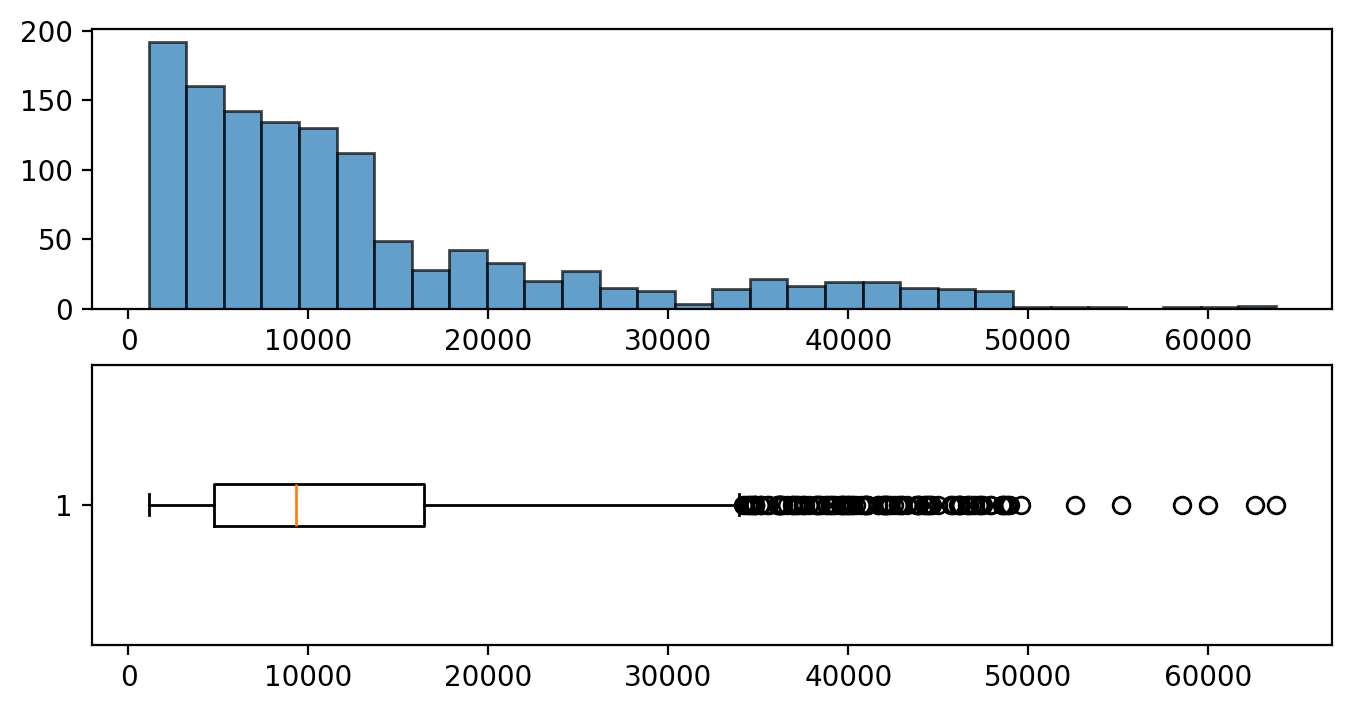

In [661]:
# Target 분포 확인
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.hist(data['charges'], bins=30, alpha=0.7, ec='k')

plt.subplot(2, 1, 2)
plt.boxplot(x=data['charges'], vert=False)
plt.show()

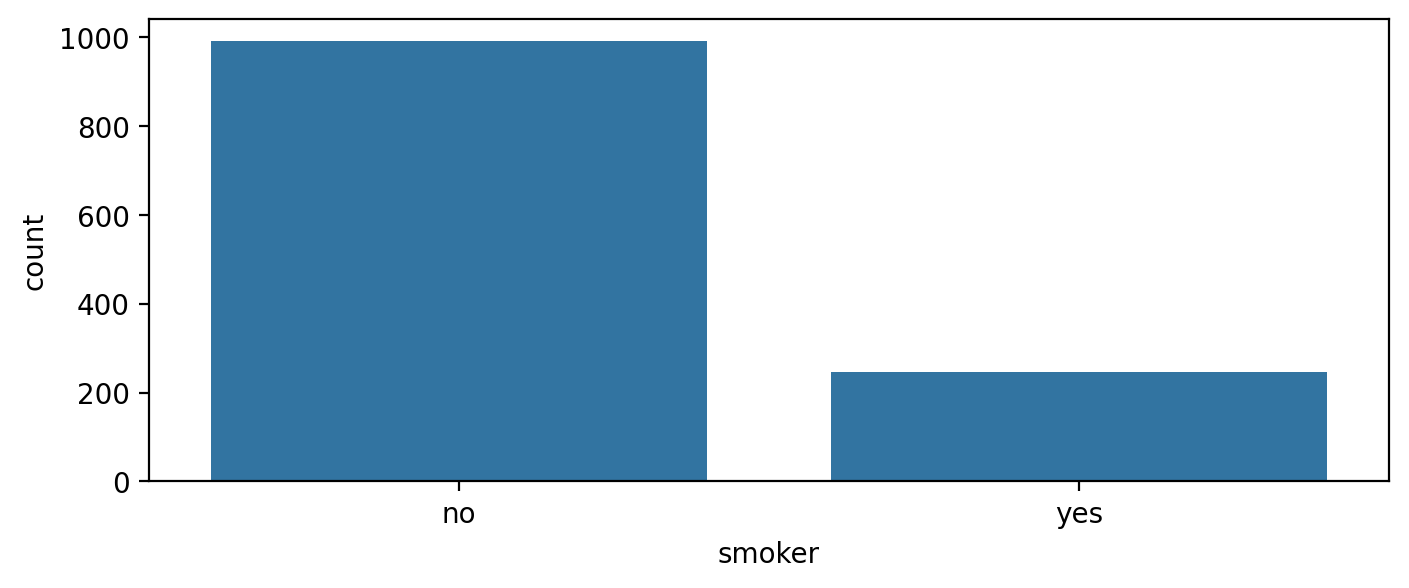

smoker
no     991
yes    247
Name: count, dtype: int64


In [669]:
# 흡연자 비율
plt.figure(figsize=(8, 3))
sns.countplot(x=data['smoker'])
plt.show()
print(data['smoker'].value_counts(normalize=True))

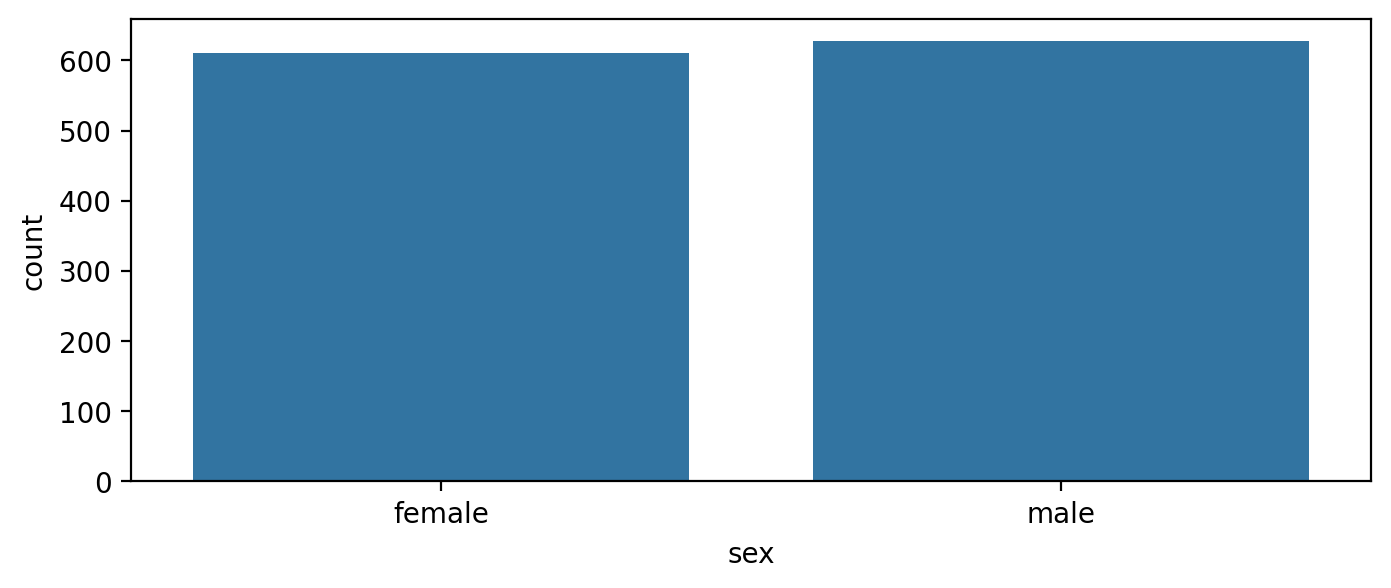

sex
male      0.506462
female    0.493538
Name: proportion, dtype: float64


In [671]:
# 남녀 비율
plt.figure(figsize=(8, 3))
sns.countplot(x=data['sex'])
plt.show()
print(data['sex'].value_counts(normalize=True))

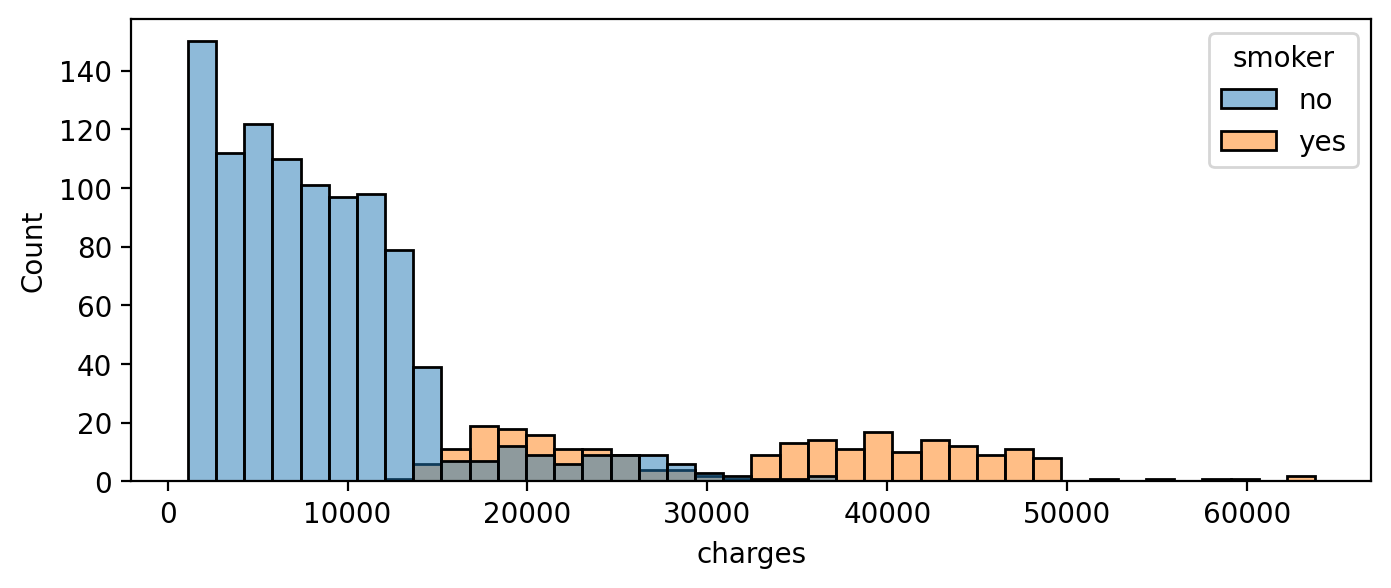

In [679]:
# 흡연 여부에 따른 의료비
plt.figure(figsize=(8, 3))
sns.histplot(x=data['charges'], hue=data['smoker'], bins=40)
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [592]:
# x, y 분리
target = 'charges'
x = data.drop(columns=target)
y = data.loc[:,target]

**2) 가변수화**

In [594]:
# 가변수화
dumm_cols = ['sex','smoker','region']
x = pd.get_dummies(x,columns=dumm_cols,drop_first=True,dtype=int)

**3) 학습용, 평가용 데이터 분리**

In [596]:
# 학습용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=1)

# 4.모델링

- 하이퍼파라미터 최적화 과정을 통해 최선의 성능을 갖는 모델을 만들고 성능을 검증합니다.
- 각 모델을 joblib.dump() 함수를 사용해 저장합니다.

In [598]:
# xgboost 설치
# !pip install xgboost

In [599]:
# lightgbm 설치
# !pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [601]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**1) Linear Regression**

- Linear Regression 알고리즘으로 모델링하고 성능을 검증합니다.
- 모델을 파일로 저장힙니다.

In [603]:
# 모델링
model = LinearRegression()

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_val_pred = model.predict(x_val)

# 평가하기
print('MAE:', mean_absolute_error(y_val, y_val_pred))
print('R2:', r2_score(y_val, y_val_pred))

MAE: 4504.899290809304
R2: 0.7354118142143975


In [604]:
# 모델저장
joblib.dump(model, 'model_linear.pkl')

['model_linear.pkl']

**2) Decision Tree**

- 하이퍼파라미터 최적화 과정을 통해 최선의 성능을 갖는 Decision Tree 모델을 만들고 성능을 검증하세요.
- 변수 중요도를 시각화해 확인하고, 모델을 파일로 저장힙니다.

In [606]:
# 파라미터 선언
param = {'max_depth': range(1, 21)}
model = GridSearchCV(DecisionTreeRegressor(),param,cv=5)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_val_pred = model.predict(x_val)

#최적 파라미터, 최고 성능 확인
print('최적 파라미터',model.best_params_)
print('최고 성능', model.best_score_)

# 평가하기
print('MAE:', mean_absolute_error(y_val, y_val_pred))
print('R2:', r2_score(y_val, y_val_pred))

최적 파라미터 {'max_depth': 4}
최고 성능 0.8317266890075053
MAE: 2741.4807110024926
R2: 0.853678773048376


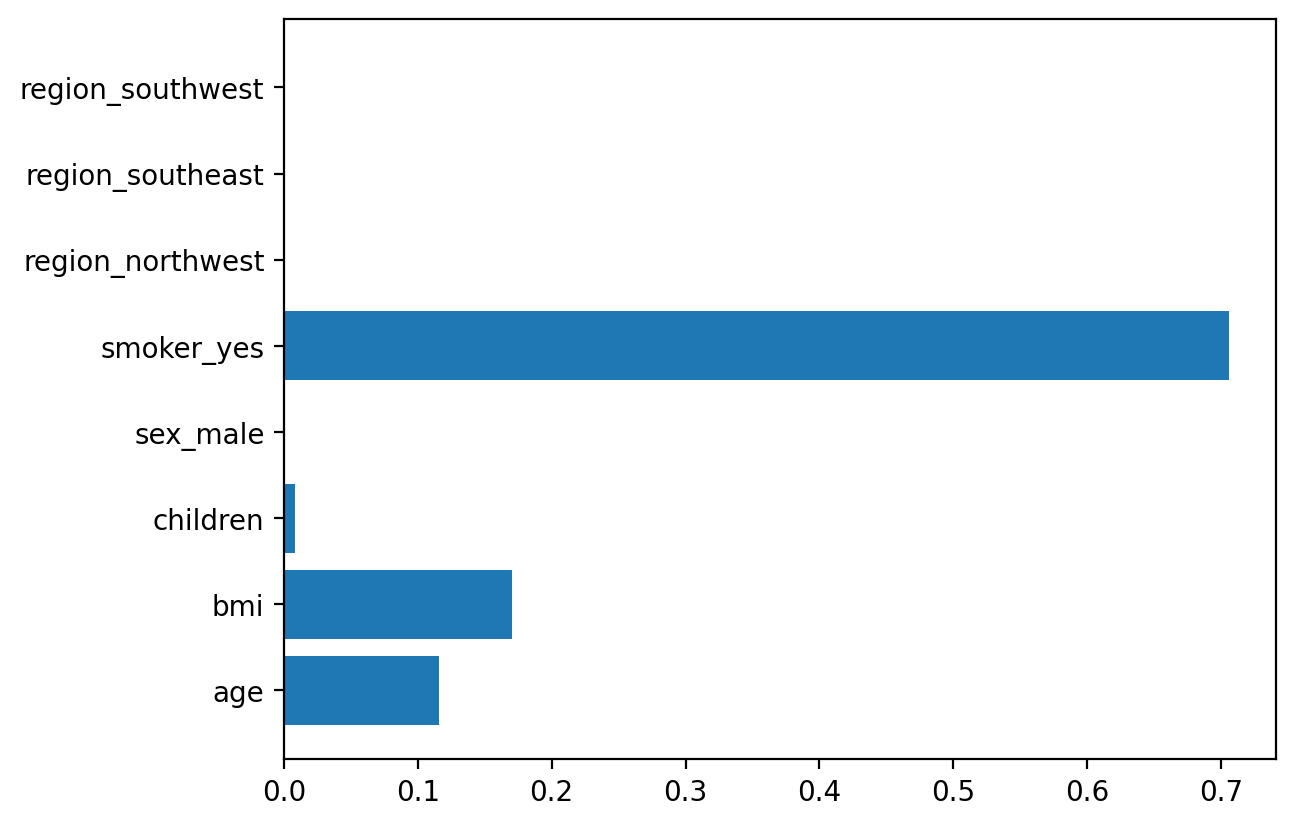

In [607]:
# 변수 중요도 시각화
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

In [608]:
# 모델저장
joblib.dump(model, 'model_tree.pkl')

['model_tree.pkl']

**3) Random Forest**

- 하이퍼파라미터 최적화 과정을 통해 최선의 성능을 갖는 Random Forest 모델을 만들고 성능을 검증하세요.
- 변수 중요도를 시각화해 확인하고, 모델을 파일로 저장힙니다.

In [610]:
# 파라미터 선언
param = {'max_depth': range(1, 21)}
model = GridSearchCV(RandomForestRegressor(),param,cv=5)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_val_pred = model.predict(x_val)

#최적 파라미터, 최고 성능 확인
print('최적 파라미터',model.best_params_)
print('최고 성능', model.best_score_)

# 평가하기
print('MAE:', mean_absolute_error(y_val, y_val_pred))
print('R2:', r2_score(y_val, y_val_pred))

최적 파라미터 {'max_depth': 4}
최고 성능 0.8440842452676861
MAE: 2682.116635889765
R2: 0.855971235786809


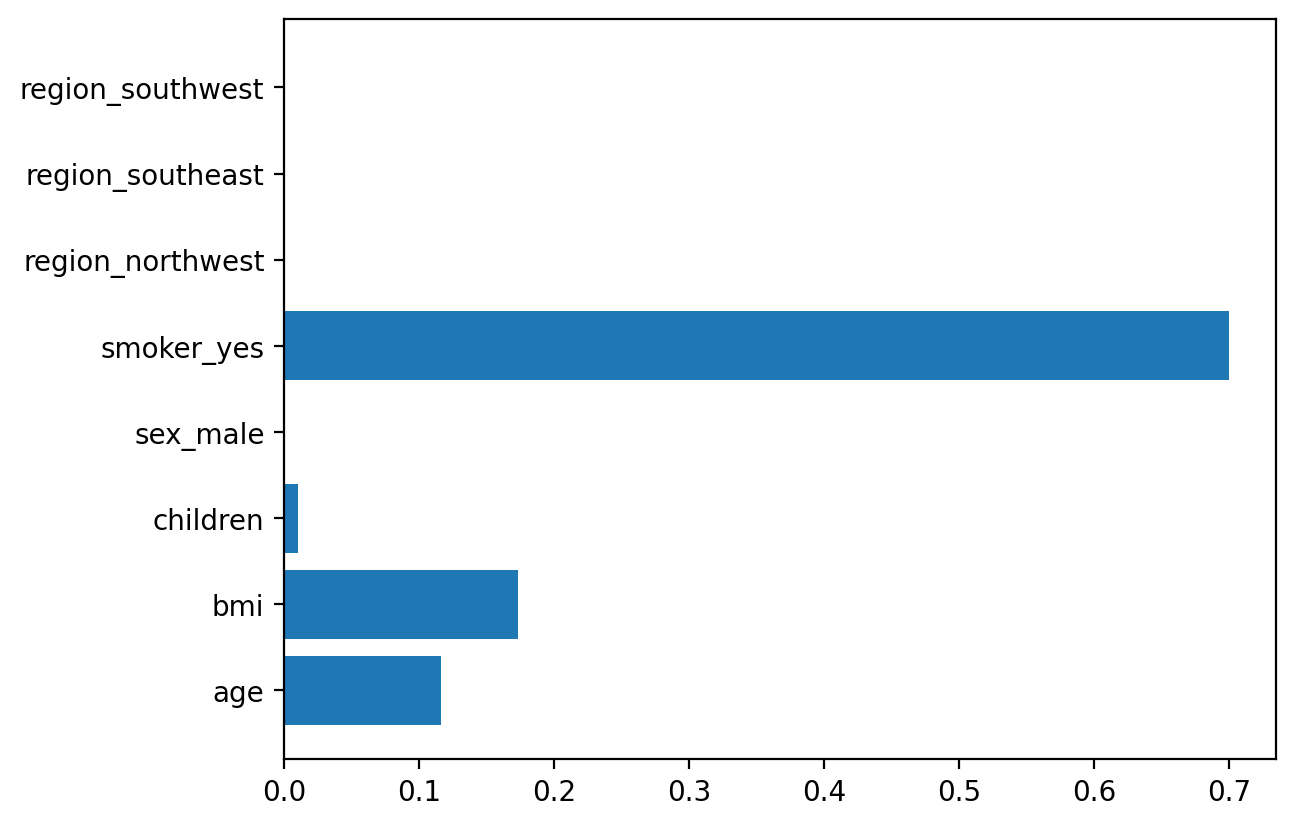

In [611]:
# 변수 중요도 시각화
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

In [612]:
# 모델저장
joblib.dump(model, 'model_forest.pkl')

['model_forest.pkl']

**4) LightGBM**

- 하이퍼파라미터 최적화 과정을 통해 최선의 성능을 갖는 LightGBM 모델을 만들고 성능을 검증하세요.
- 변수 중요도를 시각화해 확인하고, 모델을 파일로 저장힙니다.

In [614]:
# 파라미터 선언
param = {'max_depth': range(1, 21)}
model = GridSearchCV(LGBMRegressor(verbose=-1),param,cv=5)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_val_pred = model.predict(x_val)

#최적 파라미터, 최고 성능 확인
print('최적 파라미터',model.best_params_)
print('최고 성능', model.best_score_)

# 평가하기
print('MAE:', mean_absolute_error(y_val, y_val_pred))
print('R2:', r2_score(y_val, y_val_pred))

최적 파라미터 {'max_depth': 2}
최고 성능 0.8483491457389933
MAE: 2757.179977031174
R2: 0.8451752138567498


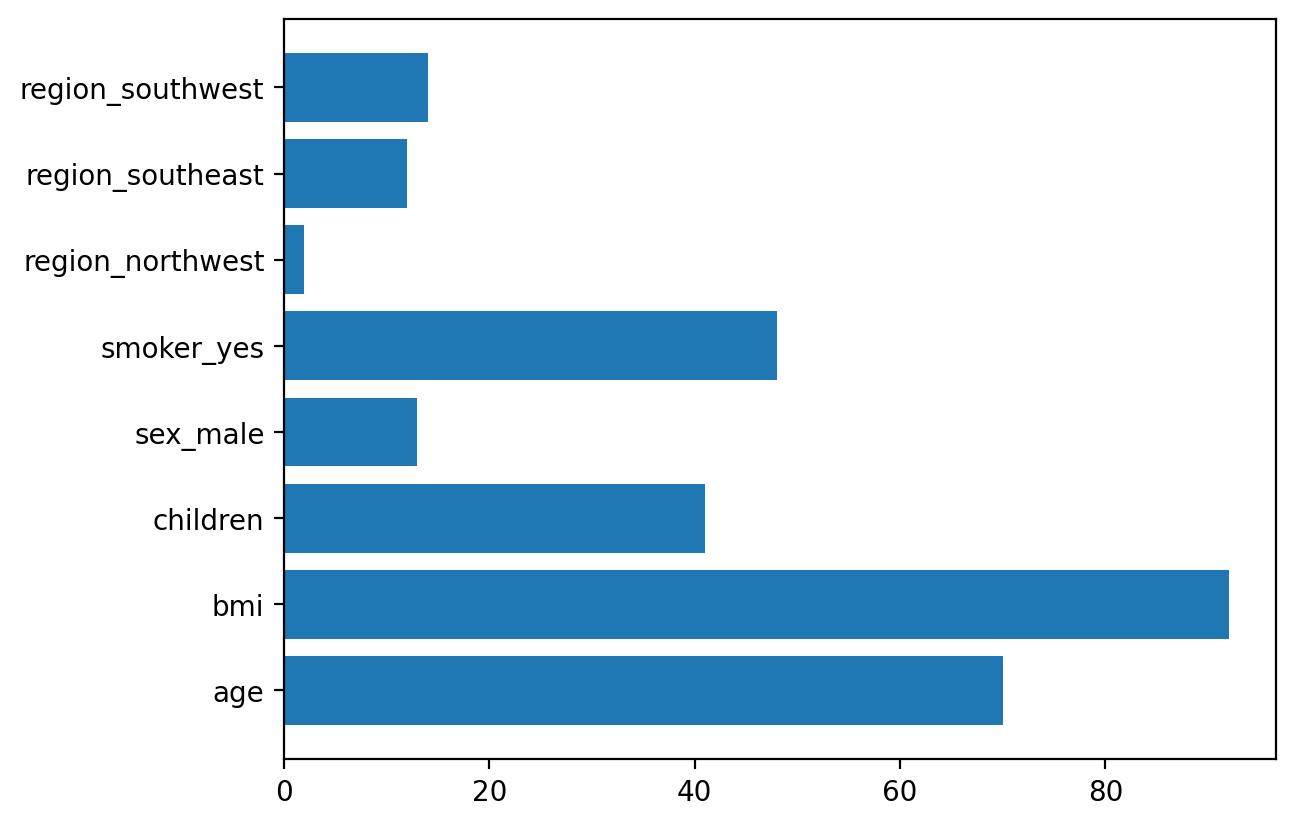

In [615]:
# 변수 중요도 시각화
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

In [616]:
# 모델저장
joblib.dump(model, 'model_lgbm.pkl')

['model_lgbm.pkl']

# 5.성능평가

- 가장 좋은 성능을 보였던 모델을 joblib.load() 함수를 사용해 불러옵니다.
- 불러온 모델로 새로운 데이터에 대해 예측을 수행합니다.

In [618]:
# 가장 좋은 성능인 모델 불러오기
model = joblib.load('model_forest.pkl')

In [619]:
# 평가용 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance_test.csv'
new_data = pd.read_csv(path)

# 확인
new_data.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


- 원본 데이터프레임을 유지하기 위해 새로운 데이터프레임으로 복사합니다.
- 복사된 데이터프레임에 대해 가변수화를 수행합니다.

In [621]:
# 데이터 복사
x_test = new_data.copy()

# 가변수화
dumm_cols = ['sex', 'smoker', 'region']
x_test = pd.get_dummies(x_test, columns=dumm_cols, drop_first=True, dtype=int)

# 확인
x_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


- 가변수화된 결과를 대상으로 예측을 수행합니다.
- 참고: 예측을 위해서는 모델이 학습했던 데이터(x_train)과 데이터 구조가 같아야 합니다.

In [623]:
# 예측하기
y_pred = model.predict(x_test)

# 확인
y_pred[:10]

array([17765.85363196,  4555.45045361,  6030.48085533,  5205.80331477,
        4920.15548395,  4850.37619998,  9235.16811188,  7351.53159431,
        7310.46764236, 14127.34267958])

- 예측 결과를 'charges_pred' 이름의 열로 원본 데이터프레임에 추가합니다.

In [551]:
# 결과 합기기
new_data['charges_pred'] = y_pred

# 확인
new_data.head()

,age,sex,bmi,children,smoker,region,charges_pred
0,19,female,27.900,0,yes,southwest,19845.963781
1,18,male,33.770,1,no,southeast,4396.415067
2,28,male,33.000,3,no,southeast,6317.241029
3,33,male,22.705,0,no,northwest,4127.809994
4,32,male,28.880,0,no,northwest,4303.035001
